<a href="https://colab.research.google.com/github/ashishkumar1232/Machine_learning_projects/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the dependent libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
diabetes_data=pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.shape

(768, 9)

In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Some Graphical representation
sns.set()

<Figure size 1000x1000 with 0 Axes>

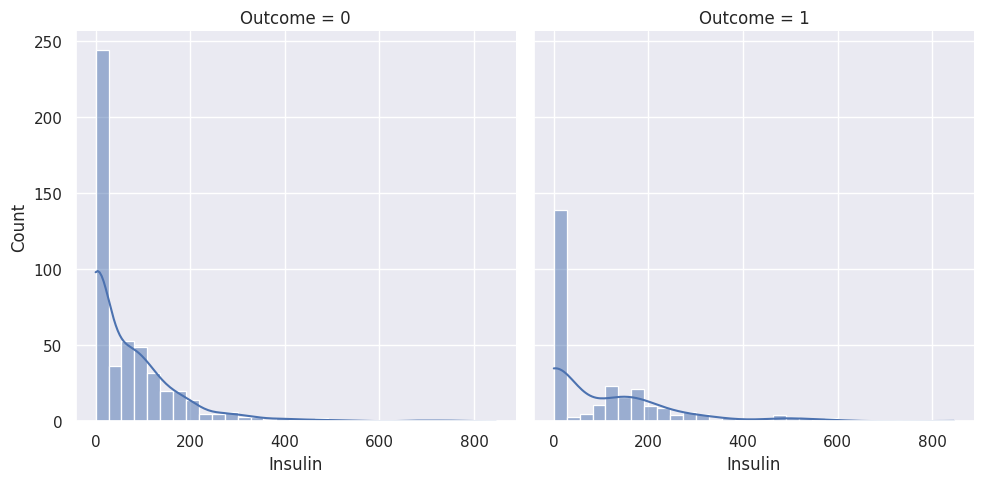

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(diabetes_data,x='Insulin',col='Outcome',kde=True)

In [ ]:
diabetes_data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
# Separating data and label columns
x=diabetes_data.drop(columns='Outcome',axis=1)
y=diabetes_data['Outcome']

In [ ]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
# Data Standardization
scaler=StandardScaler()

In [ ]:
standard_data=scaler.fit_transform(x)

In [ ]:
print(standard_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
# Splitting the data into train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


In [ ]:
# Training the model
classifier=svm.SVC(kernel='linear')

In [ ]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
# Model Evaluation
x_train_pred=classifier.predict(x_train)
training_data_acc=accuracy_score(x_train_pred,y_train)

In [ ]:
print('Training data accuracy is :', training_data_acc)

Training data accuracy is : 0.7833876221498371


In [ ]:
# Model evaluation for the test data
x_test_pred=classifier.predict(x_test)
test_data_acc=accuracy_score(x_test_pred,y_test)
print('Test data accuracy is :',test_data_acc)

Test data accuracy is : 0.7727272727272727


In [ ]:
# Predictive system

input_data=(6,148,72,35,0,33.6,0.627,50)
#convering it to numpy as=rray
input_data_as_numpy=np.asarray(input_data)
#reshaping
input_data_reshaped=input_data_as_numpy.reshape(1,-1)
#making the prediction
prediction=classifier.predict(input_data_reshaped)
print(prediction)
if prediction[0]==0:
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
